In [1]:
# import add-ons
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import numpy as np #imports
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
from scipy import stats
import netCDF4
import cmocean


In [17]:
# dataset files
dabob_filepath = 'data/Dabob_122W_48N_Jul2019_Jun2020.xlsx'
twanoh_filepath = 'data/Twanoh_123W_47N_Sep2019_Oct2020.csv'
Ndata_filepath ='data/46124o2020.txt'
Sdata_filepath = 'data/46125o2020.txt'

In [37]:
# load dabob dataset
dabob_df = pd.read_excel(dabob_filepath,header=4)
dabob_df['Cons_Dates'] = np.unique(dabob_df['Dates'].values)
mean_oxygen = []

for dates in Cons_Dates:
    #find mean of temp
    new_oxygen = np.mean(dabob_df.loc[dabob_df['Cons_Dates']==dates, 'Oxygen'])
    mean_oxygen.append(new_oxygen)
print(len(new_oxygen))

KeyError: 'Dates'

In [38]:
# Ndata
oxygen_Ndata = np.genfromtxt(Ndata_filepath,skip_header=2,usecols=(10)) # y axis
dates_Ndata = np.genfromtxt(Ndata_filepath,skip_header=2,usecols=(1)) # x axis (month and day)
display(dates_Ndata)
N_datadf = pd.Series(index=dates_Ndata[:,1],data=oxygen_Ndata, name = 'Oxygen')
# consolidate To 1 point per month
for latitude in round_lat:
    #find mean of temp
    mean_temps = np.mean(g5_sfl.loc[g5_sfl['round_lat']==latitude, 'OCEAN TEMP'])
    round_temps.append(mean_temps)
print(len(oxygen_Ndata))
print(len(dates_Ndata))

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [7]:
# Sdata
oxygen_Ndata = np.genfromtxt(Sdata_filepath,skip_header=2,usecols=10) # y axis
dates_Ndata = np.genfromtxt(Sdata_filepath,skip_header=2,usecols=(1,)) # x axis (month and day)
print(len(oxygen_Ndata))
print(len(dates_Ndata))

405
405


Text(0.5, 0, 'Time')

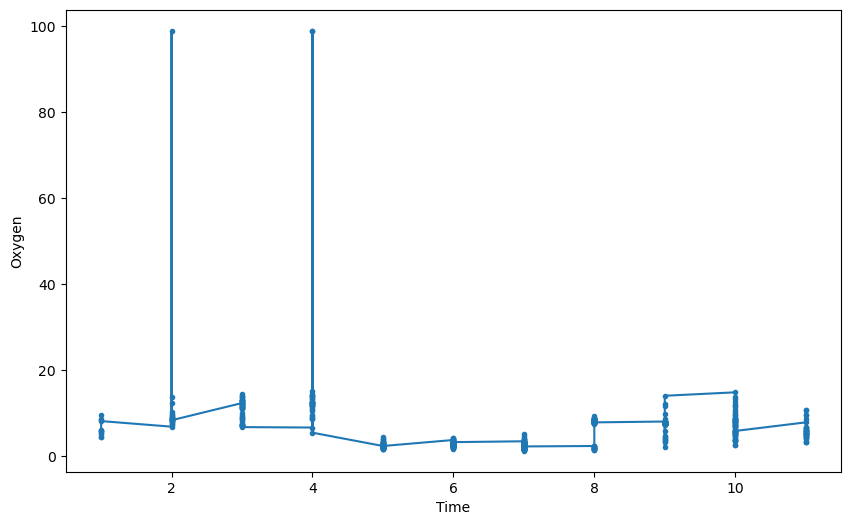

In [6]:
# plot North Data

fig,axs = plt.subplots(figsize=(10,6))
y=N_datadf.values
x=N_datadf.index.values
axs.plot(x,y,marker='.')
#axs.plot(x,y2,marker='.',c='red')
axs.set_ylabel('Oxygen')
axs.set_xlabel('Time')
#axs.legend()